Problem Statement :
Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data. The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket, class, fare, cabin, and whether or not they survived

Importing the necessary libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Loading the Dataset

In [4]:
df1 = pd.read_csv("C:\\Users\\Dell\\Music\\learning\\internships\\COGSOFT\\task1\\titanic\\train.csv")
df2 = pd.read_csv("C:\\Users\\Dell\\Music\\learning\\internships\\COGSOFT\\task1\\titanic\\test.csv")

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df1.shape


(891, 12)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
df1.drop(columns = ['Cabin'], inplace = True)

In [11]:
df2.drop(columns = ['Cabin'], inplace = True)

Checking for the Null Values

In [12]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [13]:
df2.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

Handling the Null Values

In [14]:
a = np.random.randint(df1['Age'].mean()-df1['Age'].std(),df1['Age'].mean()+df1['Age'].std(),177)

In [15]:
b = np.random.randint(df2['Age'].mean()-df2['Age'].std(),df2['Age'].mean()+df2['Age'].std(),86)

In [16]:
df1['Age'][df1['Age'].isnull()] = a

C:\Users\Dell\AppData\Local\Temp\ipykernel_19024\3256594474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Age'][df1['Age'].isnull()] = a


In [17]:
df2['Age'][df2['Age'].isnull()] = b

C:\Users\Dell\AppData\Local\Temp\ipykernel_19024\3659788960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Age'][df2['Age'].isnull()] = b


In [18]:
df1['Embarked'].fillna("S",inplace = True)
df2['Embarked'].fillna("S",inplace = True)

In [19]:
df1['Fare'].fillna(df1['Fare'].mean(),inplace = True)

In [20]:
df2['Fare'].fillna(df2['Fare'].mean(),inplace = True)

In [21]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
df2.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Exploratory Data Analysis

In [23]:
df1.groupby(['Pclass'])['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [24]:
df1.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [25]:
df1.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [26]:
df1.groupby(['Embarked'])['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           219
Name: count, dtype: int64

In [27]:
df1.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

VISUALIZATION

C:\Users\Dell\AppData\Local\Temp\ipykernel_19024\3503546760.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'],bins = 10,rug = True)


<Axes: xlabel='Age', ylabel='Density'>

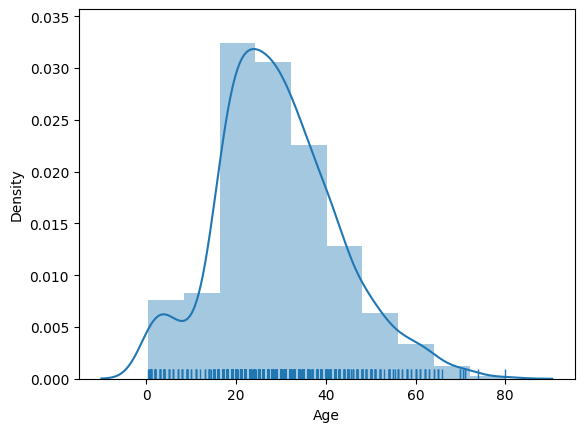

In [28]:
sns.distplot(df1['Age'],bins = 10,rug = True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19024\2916572459.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'][df1['Survived']==0])
C:\Users\Dell\AppData\Local\Temp\ipykernel_19024\2916572459.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'][df1['Survived']==1])


<Axes: xlabel='Age', ylabel='Density'>

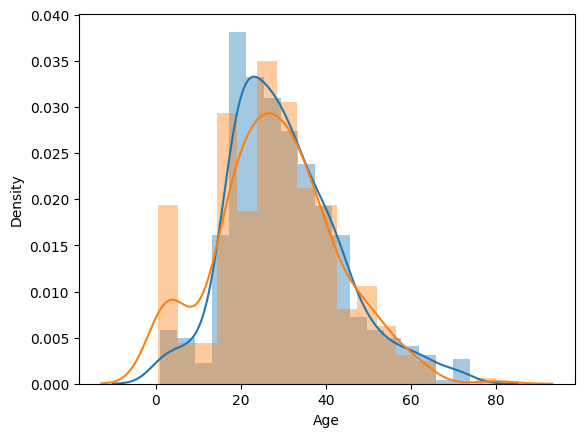

In [29]:
sns.distplot(df1['Age'][df1['Survived']==0])
sns.distplot(df1['Age'][df1['Survived']==1])

C:\Users\Dell\AppData\Local\Temp\ipykernel_19024\217930938.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Fare'][df1['Survived']==0])
C:\Users\Dell\AppData\Local\Temp\ipykernel_19024\217930938.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Fare'][df1['Survived']==1])


<Axes: xlabel='Fare', ylabel='Density'>

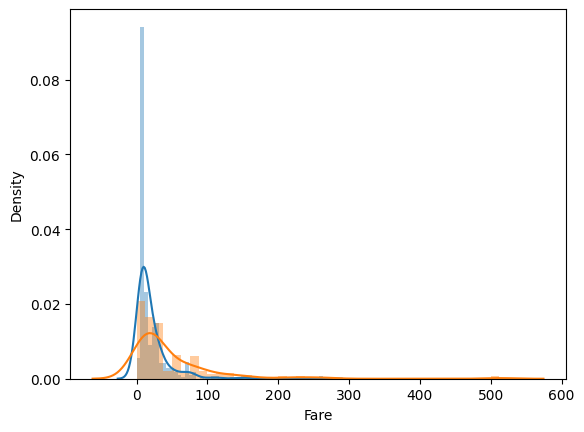

In [30]:
sns.distplot(df1['Fare'][df1['Survived']==0])
sns.distplot(df1['Fare'][df1['Survived']==1])

In [31]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [32]:
df1.drop(columns = ['Ticket','Name'], inplace = True)

In [33]:
df1.groupby(['Parch'])['Survived'].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: count, dtype: int64

In [34]:
df1.groupby(['Parch'])['Survived'].mean()

Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

In [35]:
df1['Family'] = df1['Parch']+df1['SibSp']+1
df2['Family'] = df2['Parch']+df2['SibSp']+1

In [36]:
df1['Family'].value_counts()

Family
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [37]:
df1.groupby(['Family'])['Survived'].mean()

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [38]:
def calculate(n):
    if n==1:
        return "Alone"
    elif n>1 and n<5:
        return "Small"
    else:
        return "Large"

In [39]:
df1['Family_size'] = df1['Family'].apply(calculate)

In [40]:
df2['Family_size'] = df2['Family'].apply(calculate)

In [41]:
df1

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_size
0,1,0,3,male,22.0,1,0,7.2500,S,2,Small
1,2,1,1,female,38.0,1,0,71.2833,C,2,Small
2,3,1,3,female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,female,35.0,1,0,53.1000,S,2,Small
4,5,0,3,male,35.0,0,0,8.0500,S,1,Alone
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1,Alone
887,888,1,1,female,19.0,0,0,30.0000,S,1,Alone
888,889,0,3,female,42.0,1,2,23.4500,S,4,Small
889,890,1,1,male,26.0,0,0,30.0000,C,1,Alone


In [42]:
df1.drop(columns =['Parch','SibSp','Family'], inplace = True)


In [43]:
df2.drop(columns = ['Parch','SibSp','Family'], inplace = True)

In [44]:
passenger_id = df2['PassengerId'].values

In [45]:
df1.drop(columns= ['PassengerId'],inplace = True)
df2.drop(columns= ['Name','PassengerId'],inplace = True)

In [46]:
df1.isnull().sum()

Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
Embarked       0
Family_size    0
dtype: int64

In [47]:
df1.head(2)

,Survived,Pclass,Sex,Age,Fare,Embarked,Family_size
0,0,3,male,22.0,7.2500,S,Small
1,1,1,female,38.0,71.2833,C,Small


In [48]:
df1.shape

(891, 7)

Data Preprocessing

In [49]:
df1 = pd.get_dummies(df1,columns = ['Pclass','Sex','Embarked','Family_size'],drop_first= True)

In [50]:
df1.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Family_size_Large', 'Family_size_Small'],
      dtype='object')

In [51]:
cols_to_convert = ['Pclass_2','Pclass_3','Sex_male','Embarked_Q','Embarked_S','Family_size_Large','Family_size_Small']
df1[cols_to_convert] = df1[cols_to_convert].astype(int)

In [52]:
df1

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Small
0,0,22.0,7.2500,0,1,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0,0,1
2,1,26.0,7.9250,0,1,0,0,1,0,0
3,1,35.0,53.1000,0,0,0,0,1,0,1
4,0,35.0,8.0500,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,1,0,1,0,1,0,0
887,1,19.0,30.0000,0,0,0,0,1,0,0
888,0,42.0,23.4500,0,1,0,0,1,0,1
889,1,26.0,30.0000,0,0,1,0,0,0,0


In [53]:
df2 = pd.get_dummies(df2,columns = ['Pclass','Sex','Embarked','Family_size'],drop_first= True)

In [54]:
df2.columns

Index(['Age', 'Ticket', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Family_size_Large', 'Family_size_Small'],
      dtype='object')

In [55]:
cols_to_convert = ['Pclass_2','Pclass_3','Sex_male','Embarked_Q','Embarked_S','Family_size_Large','Family_size_Small']
df2[cols_to_convert] = df2[cols_to_convert].astype(int)

In [56]:
df2

,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Small
0,34.5,330911,7.8292,0,1,1,1,0,0,0
1,47.0,363272,7.0000,0,1,0,0,1,0,1
2,62.0,240276,9.6875,1,0,1,1,0,0,0
3,27.0,315154,8.6625,0,1,1,0,1,0,0
4,22.0,3101298,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
413,31.0,A.5. 3236,8.0500,0,1,1,0,1,0,0
414,39.0,PC 17758,108.9000,0,0,0,0,0,0,0
415,38.5,SOTON/O.Q. 3101262,7.2500,0,1,1,0,1,0,0
416,28.0,359309,8.0500,0,1,1,0,1,0,0


In [57]:
df2.drop(columns = ['Ticket'],inplace = True)

In [58]:
df2

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_size_Large,Family_size_Small
0,34.5,7.8292,0,1,1,1,0,0,0
1,47.0,7.0000,0,1,0,0,1,0,1
2,62.0,9.6875,1,0,1,1,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0
4,22.0,12.2875,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
413,31.0,8.0500,0,1,1,0,1,0,0
414,39.0,108.9000,0,0,0,0,0,0,0
415,38.5,7.2500,0,1,1,0,1,0,0
416,28.0,8.0500,0,1,1,0,1,0,0


Splitting the data for Trainning and Testing

In [59]:
x = df1.iloc[:,1:].values
y = df1.iloc[:,0].values


In [141]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

Machine Learning 

In [142]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=7)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7)

In [143]:
y_predict = dt.predict(x_test)

In [144]:
print(y_predict)

[1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0
 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0]


In [145]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.8547486033519553


In [146]:
from sklearn.ensemble import RandomForestClassifier

In [147]:
rf = RandomForestClassifier()

In [148]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [149]:
y_pred = rf.predict(x_test)

In [151]:
print(accuracy_score(y_pred,y_test))

0.8156424581005587


In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid  = GridSearchCV(rf,param_grid, cv= 5)

In [154]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [155]:
best_params = grid.best_params_

# Use the best model
best_rf_model = grid.best_estimator_

In [156]:
ans = best_rf_model.predict(x_test)

In [157]:
print(accuracy_score(ans,y_test))

0.8491620111731844


In [158]:
ans.shape

(179,)

In [159]:
x_final = df2.iloc[:,:].values

In [78]:
y_final = best_rf_model.predict(x_final)

In [79]:
y_final.shape

(418,)

In [80]:
passenger_id.shape

(418,)

In [81]:
final_out = pd.DataFrame()

In [82]:
final_out

""


In [83]:
final_out['passengerId']  = passenger_id
final_out['survived'] = y_final

In [84]:
final_out.head(5)

,passengerId,survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [85]:
# final_out.to_csv("C:\\Users\\Dell\\Music\\learning\\COGSOFT\\task1\\titanic\\titanic_prediction_submission_1.csv",index = False)